In [1]:
%pylab inline

# Data handling
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Print versions
print pd.__version__

Populating the interactive namespace from numpy and matplotlib
0.19.2


# Utilities

In [2]:
def print_missing_columns(df):
    """Print the columns in the DataFrame with missing data.
    """
    for column in df.columns:
        nmissing = len(df[df[column].isnull()])
        if nmissing > 0: 
            print [column, nmissing], 

# Read data and summarize it

In [35]:
# Data with X AND y.
df_train = pd.read_csv('train.csv')

# Data with just X. You submit your prediction for y.
df_test = pd.read_csv('test.csv')

In [4]:
# Note: the index is 0-based and 'Id' is 1-based
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print df_train.shape, df_test.shape
print df_train.columns

(1460, 81) (1459, 80)
Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
 

## Labels (y data)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


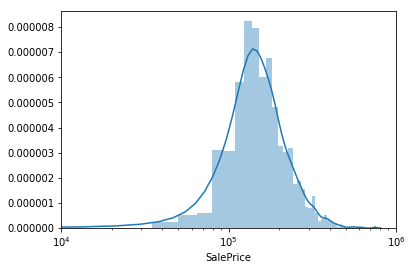

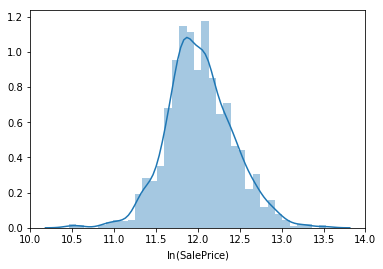

In [5]:
# The y data (quantity you want to predict):
print df_train['SalePrice'].describe()

fig, ax = plt.subplots()
ax = sns.distplot(df_train['SalePrice'])
ax.set_xscale('log')
ax.set_xlim(1.0e4, 1.0e6)

# You should predict ln(y) instead of y since y spans 1.3 orders of magnitude.
# Easier to fit with a linear model.
fig, ax = plt.subplots()
ax = sns.distplot(np.log(df_train['SalePrice'].values))
ax.set_xlabel(r'$\ln({\rm SalePrice})$')

## Missing features

In [6]:
print_missing_columns(df_train)
print '\n'
print_missing_columns(df_test)

['LotFrontage', 259] ['Alley', 1369] ['MasVnrType', 8] ['MasVnrArea', 8] ['BsmtQual', 37] ['BsmtCond', 37] ['BsmtExposure', 38] ['BsmtFinType1', 37] ['BsmtFinType2', 38] ['Electrical', 1] ['FireplaceQu', 690] ['GarageType', 81] ['GarageYrBlt', 81] ['GarageFinish', 81] ['GarageQual', 81] ['GarageCond', 81] ['PoolQC', 1453] ['Fence', 1179] ['MiscFeature', 1406] 

['MSZoning', 4] ['LotFrontage', 227] ['Alley', 1352] ['Utilities', 2] ['Exterior1st', 1] ['Exterior2nd', 1] ['MasVnrType', 16] ['MasVnrArea', 15] ['BsmtQual', 44] ['BsmtCond', 45] ['BsmtExposure', 44] ['BsmtFinType1', 42] ['BsmtFinSF1', 1] ['BsmtFinType2', 42] ['BsmtFinSF2', 1] ['BsmtUnfSF', 1] ['TotalBsmtSF', 1] ['BsmtFullBath', 2] ['BsmtHalfBath', 2] ['KitchenQual', 1] ['Functional', 2] ['FireplaceQu', 730] ['GarageType', 76] ['GarageYrBlt', 78] ['GarageFinish', 78] ['GarageCars', 1] ['GarageArea', 1] ['GarageQual', 78] ['GarageCond', 78] ['PoolQC', 1456] ['Fence', 1169] ['MiscFeature', 1408] ['SaleType', 1]


# Begin choosing features

## Split into Numerical and categorical features

In [54]:
# Numerical features (datatype is not 'object')
df_train_num = df_train.select_dtypes(exclude=['object'])

# Categorical features
df_train_cat = df_train.select_dtypes(include=['object'])

print df_train_num.shape, df_train_cat.shape
print df_train_num.columns
print df_train_cat.columns

(1460, 38) (1460, 43)
Index([u'Id', u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')
Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'B

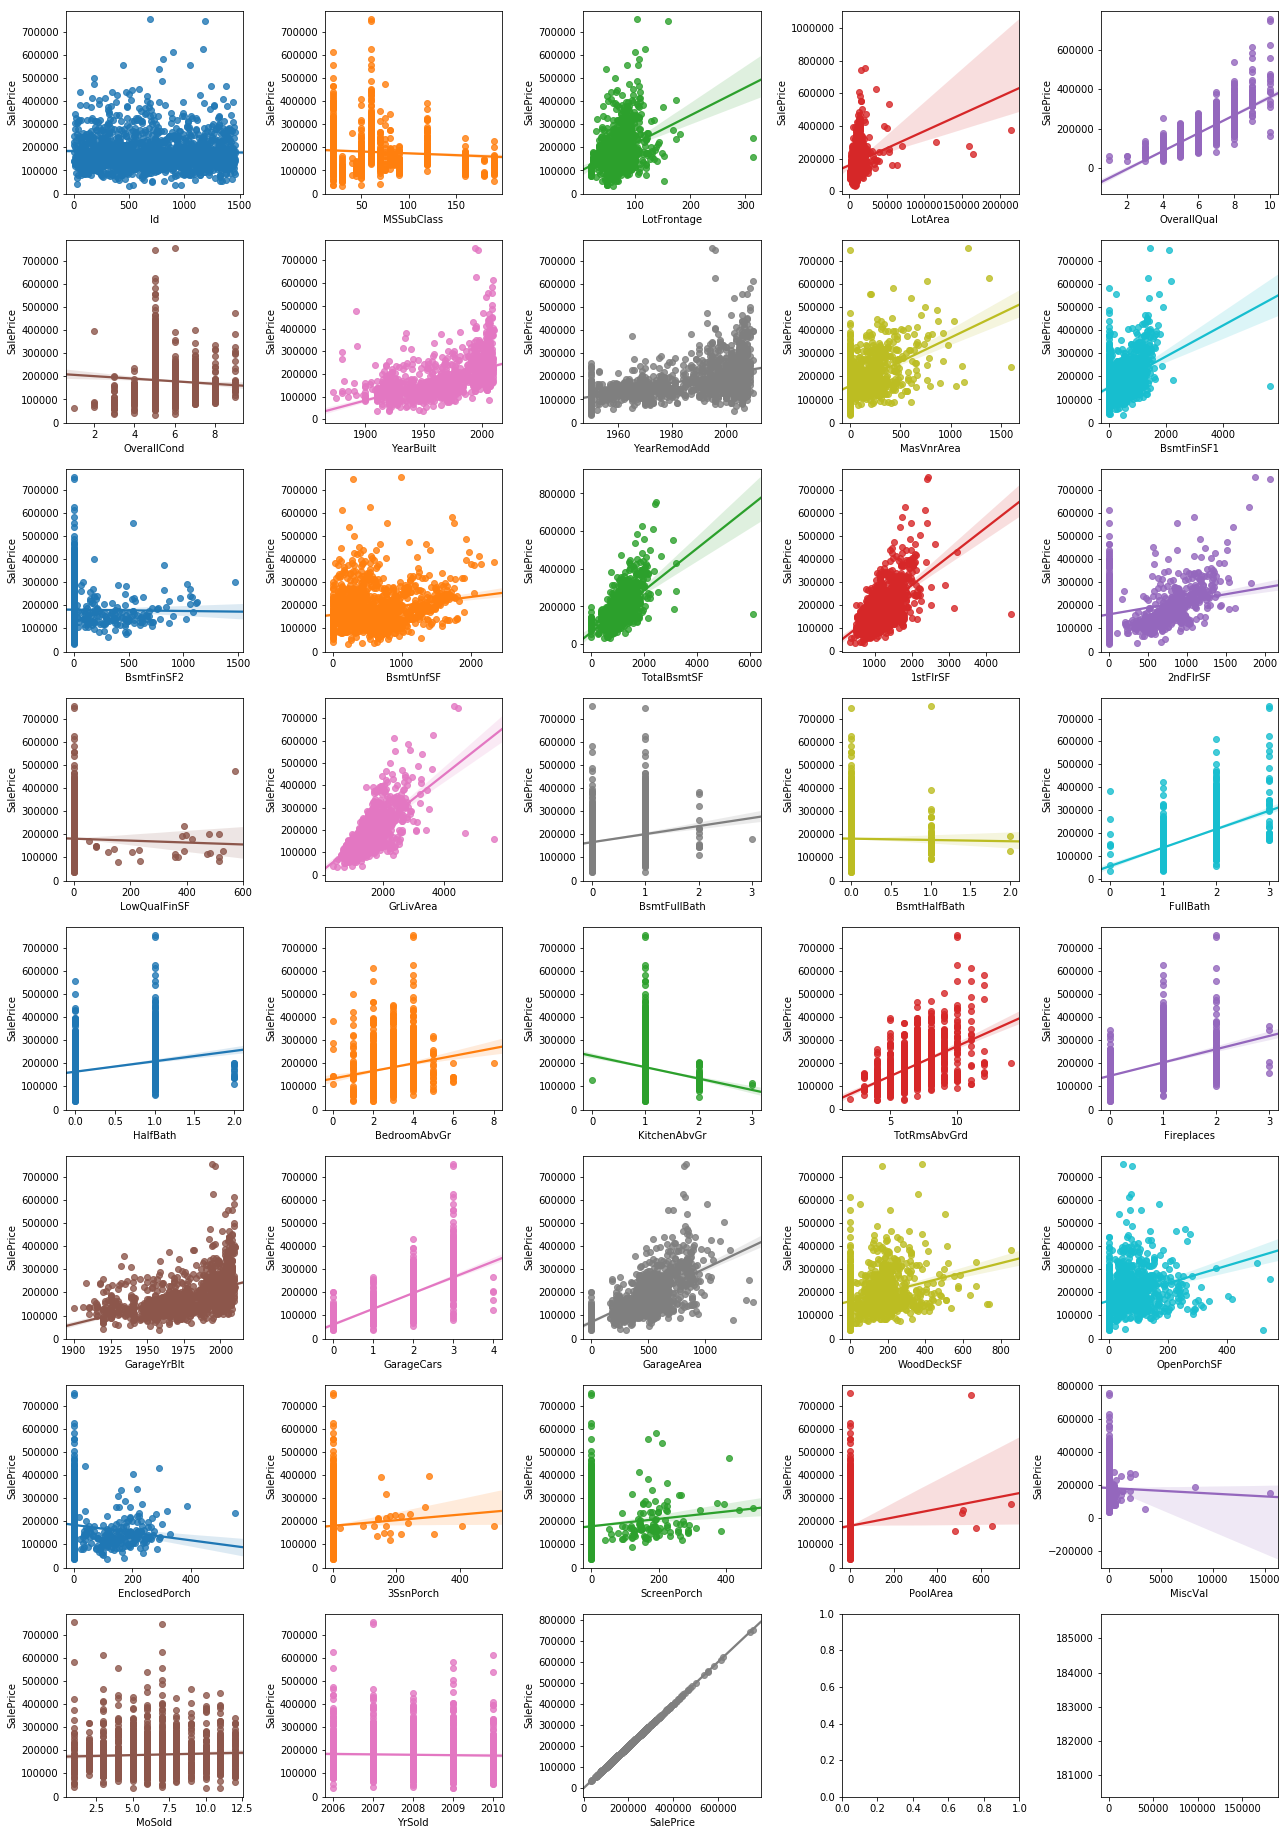

In [65]:
n = len(df_train_num.columns)
ncol = 5
nrow = n//ncol + 1

fig, ax = plt.subplots(nrow, ncol, figsize=(18, 3.2*nrow))

for i in range(n):
    column = df_train_num.columns[i]
    axes = ax[i//ncol, i%ncol]
    sns.regplot(x=column, y='SalePrice', data=df_train, x_jitter=False, ax=axes)

fig.tight_layout()

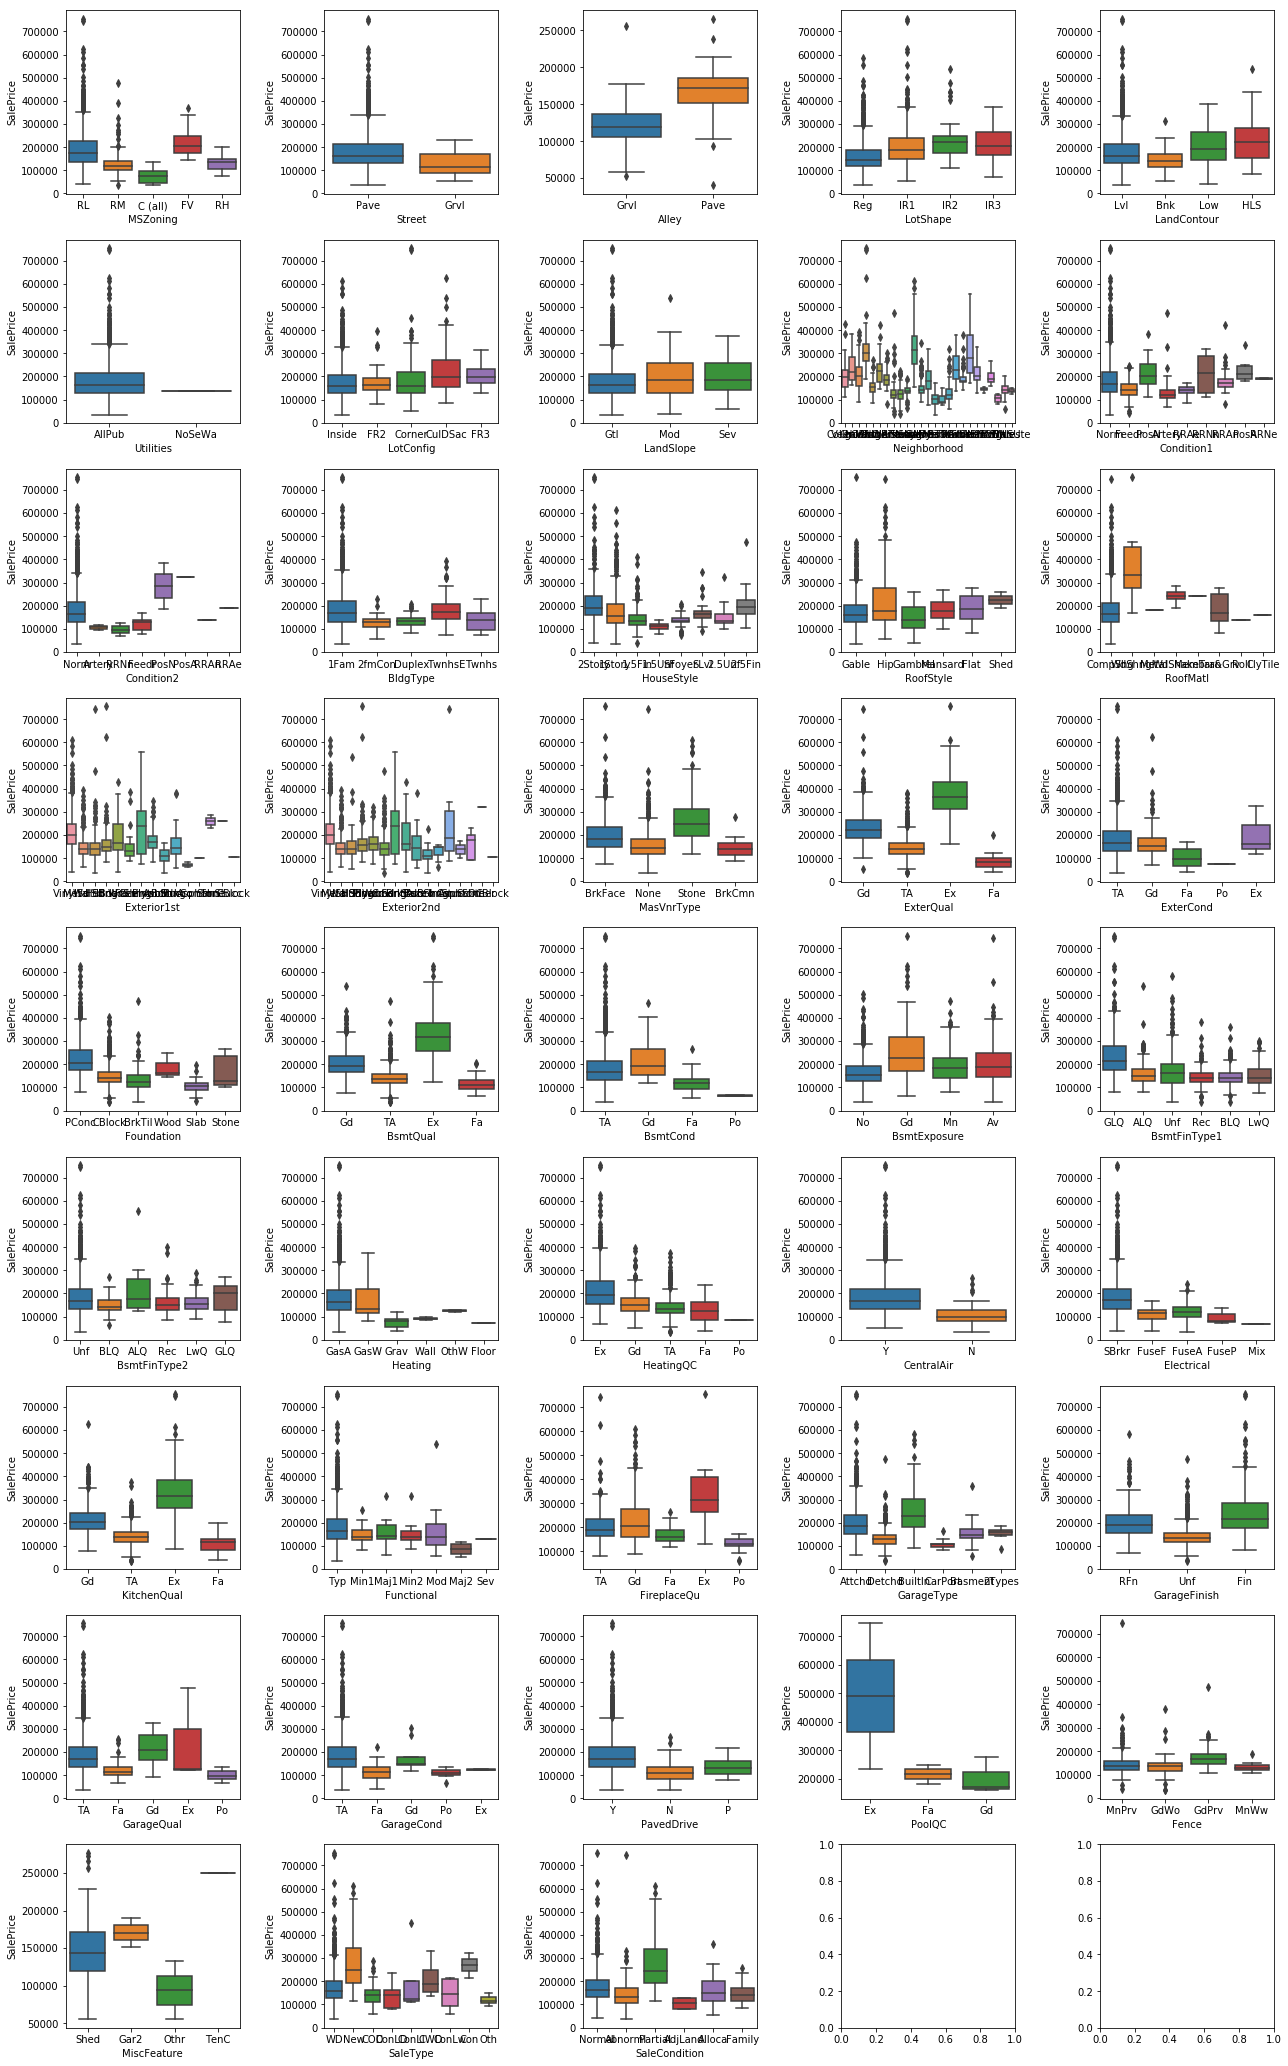

In [66]:
n = len(df_train_cat.columns)
ncol = 5
nrow = n//ncol + 1

fig, ax = plt.subplots(nrow, ncol, figsize=(18, 3.2*nrow))

for i in range(n):
    # TODO: plot NaN's as separate feature.
    column = df_train_cat.columns[i]
    axes = ax[i//ncol, i%ncol]
    sns.boxplot(x=column, y='SalePrice', data=df_train, ax=axes)

fig.tight_layout()

#### Calculate |correlation| with 'SalePrice' for both numerical and categorical features

In [9]:
# Rank correlations with 'SalePrice'

# pandas correlation DataFrame object
cor_matrix = df_train.corr()
# Absolute value of the correlations
cor_matrix = cor_matrix.abs()
# Sort by SalePrice
cor_matrix.sort_values(['SalePrice'], ascending=False, inplace=True)
print cor_matrix['SalePrice']

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [10]:
# Must turn categories into numerical values with one hot encoding to calculate correlations
df_train_cat['SalePrice'] = df_train['SalePrice']
cor_matrix = pd.get_dummies(df_train_cat).corr()
cor_matrix = cor_matrix.abs()
cor_matrix.sort_values(['SalePrice'], ascending=False, inplace=True)
print cor_matrix['SalePrice']

SalePrice                1.000000
ExterQual_TA             0.589044
BsmtQual_Ex              0.553105
KitchenQual_TA           0.519298
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
ExterQual_Gd             0.452466
BsmtQual_TA              0.452394
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
GarageFinish_Unf         0.410608
Neighborhood_NridgHt     0.402149
MasVnrType_None          0.374468
SaleType_New             0.357509
GarageType_Detchd        0.354141
SaleCondition_Partial    0.352060
Foundation_CBlock        0.343263
FireplaceQu_Gd           0.339329
GarageType_Attchd        0.335961
MasVnrType_Stone         0.330476
Neighborhood_NoRidge     0.330424
KitchenQual_Gd           0.321641
HeatingQC_TA             0.312677
BsmtExposure_Gd          0.307298
Exterior2nd_VinylSd      0.306389
Exterior1st_VinylSd      0.305009
MSZoning_RM              0.288065
GarageCond_TA 

/Users/lackey/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# Clean data

In [92]:
def clean_data(df):
    """Clean the chosen features in the DataFrame.
    Fill NaN's.
    Convert qualitatively ranked features to numerical ranking.
    Perform one hot encoding on categorical features.
    """
    
    df_clean = pd.DataFrame()
    
    df_clean['Id'] = df['Id']
    if 'SalePrice' in df.columns:
        df_clean['SalePrice'] = df['SalePrice']
    
    columns = [
        # Numerical
        'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 
        '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
        #'YearRemodAdd', 
        #'GarageYrBlt', 
        'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 
        # Qualitative ranking
        'ExterQual', 'BsmtQual', 'KitchenQual', 'BsmtFinType1', 'HeatingQC', 'GarageFinish', 
        'GarageType', 
        # Categorical
        'Foundation', 'Neighborhood']
    
    # Check for missing data
    print '\nSelected columns with missing data (before cleaning):'
    print_missing_columns(df[columns])
    
    df_clean[columns] = df[columns]
    
    
    ############## Numerical features ###############
    
    
    # OverallQual: Rates the overall material and finish of the house
    
    # GrLivArea: Above grade (ground) living area square feet
    
    # GarageCars: Size of garage in car capacity
    df_clean['GarageCars'] = df_clean['GarageCars'].fillna(0)
    
    # GarageArea: Size of garage in square feet
    df_clean['GarageArea'] = df_clean['GarageArea'].fillna(0)
    
    # TotalBsmtSF: Total square feet of basement area
    df_clean['TotalBsmtSF'] = df_clean['TotalBsmtSF'].fillna(0)
    
    # 1stFlrSF: First Floor square feet
    
    # FullBath: Full bathrooms above grade

    # TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    
    # YearBuilt: Original construction date
    
    # MasVnrArea: Masonry veneer area in square feet
    df_clean['MasVnrArea'] = df_clean['MasVnrArea'].fillna(0)
    
    # Fireplaces: Number of fireplaces
    df_clean['Fireplaces'] = df_clean['Fireplaces'].fillna(0)
    
    # BsmtFinSF1: Type 1 finished square feet
    df_clean['BsmtFinSF1'] = df_clean['BsmtFinSF1'].fillna(0)
    
    # LotFrontage: Linear feet of street connected to property
    df_clean['LotFrontage'] = df_clean['LotFrontage'].fillna(0)
    
    
    ############### Qualitatively ranked features #############
    
    
    # ExterQual: Evaluates the quality of the material on the exterior
    # Try 'TA' for missing values. Or, should you try the most common value?
    # (You will recenter and rescale the actual numbers so the exact starting value 'Po'=1 doesn't matter.)
    column = 'ExterQual'
    df_clean[column] = df_clean[column].fillna('TA')
    df_clean = df_clean.replace({column: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}})
    
    # BsmtQual: Evaluates the height of the basement
    # NA means no basement
    # !!! Could be bad idea to say 'no basement' is worse than 'poor basement'
    column = 'BsmtQual'
    df_clean[column] = df_clean[column].fillna('No')
    df_clean = df_clean.replace({column: {'No':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}})
    
    # KitchenQual: Kitchen quality
    column = 'KitchenQual'
    df_clean[column] = df_clean[column].fillna('TA')
    df_clean = df_clean.replace({column: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}})
    
    # BsmtFinType1: Rating of basement finished area
    # !!! Should 'No' and 'Unf' really be less than the other categories (especially 'LwQ')?
    column = 'BsmtFinType1'
    df_clean[column] = df_clean[column].fillna('No')
    df_clean = df_clean.replace({column: {'No':0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}})
    
    # HeatingQC: Heating quality and condition
    column = 'HeatingQC'
    df_clean[column] = df_clean[column].fillna('TA')
    df_clean = df_clean.replace({column: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}})
    
    # GarageFinish: Interior finish of the garage
    # Na means no garage
    column = 'GarageFinish'
    df_clean[column] = df_clean[column].fillna('No')
    df_clean = df_clean.replace({column: {'No':0, 'Unf': 1, 'RFn': 2, 'Fin': 3}})
    
    # GarageType: Garage location
    # NA means no garage.
    # Not so nice kind (or none) = 0. Nice kind = 1.
    column = 'GarageType'
    df_clean[column] = df_clean[column].fillna('No')
    df_clean = df_clean.replace({column: {'No':0, '2Types': 0, 'Basment': 0, 'CarPort': 0, 'Detchd': 0, 
                                          'Attchd': 1, 'BuiltIn': 1}})
    
    
    ############## Categorical features. Use one hot encoding. ##############
    
    
    # Foundation: Type of foundation
    # NaN's are zero for all dummy features
    df_clean = pd.get_dummies(df_clean, columns=['Foundation'], dummy_na=False)
    
    # Neighborhood: Physical locations within Ames city limits
    df_clean = pd.get_dummies(df_clean, columns=['Neighborhood'], dummy_na=False)

    # Check for missing data
    print '\nSelected columns with missing data (after cleaning):'
    print_missing_columns(df_clean)
    
    return df_clean

In [93]:
df_train_clean = clean_data(df_train)
df_test_clean = clean_data(df_test)

print df_train.shape, df_test.shape
print df_train_clean.shape, df_test_clean.shape


Selected columns with missing data (before cleaning):
['MasVnrArea', 8] ['LotFrontage', 259] ['BsmtQual', 37] ['BsmtFinType1', 37] ['GarageFinish', 81] ['GarageType', 81] 
Selected columns with missing data (after cleaning):

Selected columns with missing data (before cleaning):
['GarageCars', 1] ['GarageArea', 1] ['TotalBsmtSF', 1] ['MasVnrArea', 15] ['BsmtFinSF1', 1] ['LotFrontage', 227] ['BsmtQual', 44] ['KitchenQual', 1] ['BsmtFinType1', 42] ['GarageFinish', 78] ['GarageType', 76] 
Selected columns with missing data (after cleaning):
(1460, 81) (1459, 80)
(1460, 53) (1459, 52)


# Plot most significant features (before and after cleaning data)

TODO: Make side-by-side comparison so it's easier to see differences.

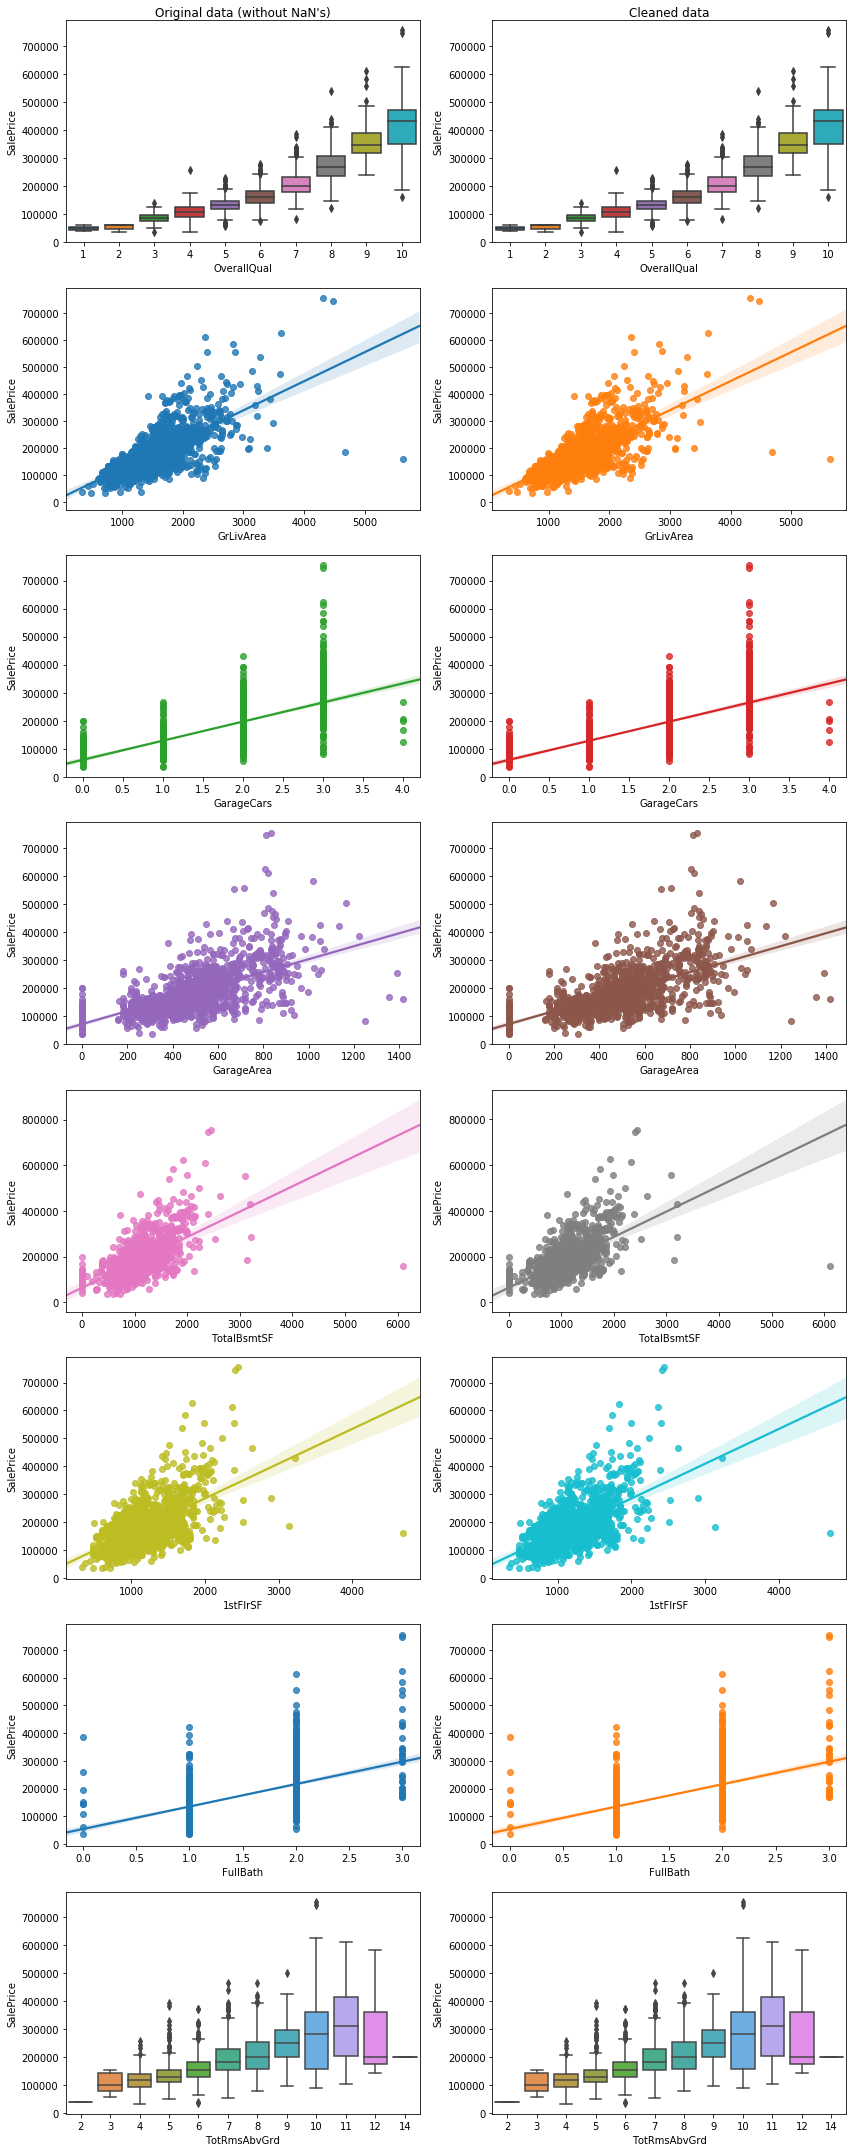

In [72]:
fig, ax = plt.subplots(8, 2, figsize=(12, 30))

sns.boxplot(x='OverallQual', y='SalePrice', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title("Original data (without NaN's)")
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train_clean, ax=ax[0, 1])
ax[0, 1].set_title("Cleaned data")

sns.regplot(x='GrLivArea', y='SalePrice', data=df_train, ax=ax[1, 0])
sns.regplot(x='GrLivArea', y='SalePrice', data=df_train_clean, ax=ax[1, 1])

sns.regplot(x='GarageCars', y='SalePrice', data=df_train, ax=ax[2, 0])
sns.regplot(x='GarageCars', y='SalePrice', data=df_train_clean, ax=ax[2, 1])

sns.regplot(x='GarageArea', y='SalePrice', data=df_train, ax=ax[3, 0])
sns.regplot(x='GarageArea', y='SalePrice', data=df_train_clean, ax=ax[3, 1])

sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df_train, ax=ax[4, 0])
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df_train_clean, ax=ax[4, 1])

sns.regplot(x='1stFlrSF', y='SalePrice', data=df_train, ax=ax[5, 0])
sns.regplot(x='1stFlrSF', y='SalePrice', data=df_train_clean, ax=ax[5, 1])

sns.regplot(x='FullBath', y='SalePrice', data=df_train, ax=ax[6, 0])
sns.regplot(x='FullBath', y='SalePrice', data=df_train_clean, ax=ax[6, 1])

sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=df_train, ax=ax[7, 0])
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=df_train_clean, ax=ax[7, 1])

fig.tight_layout()

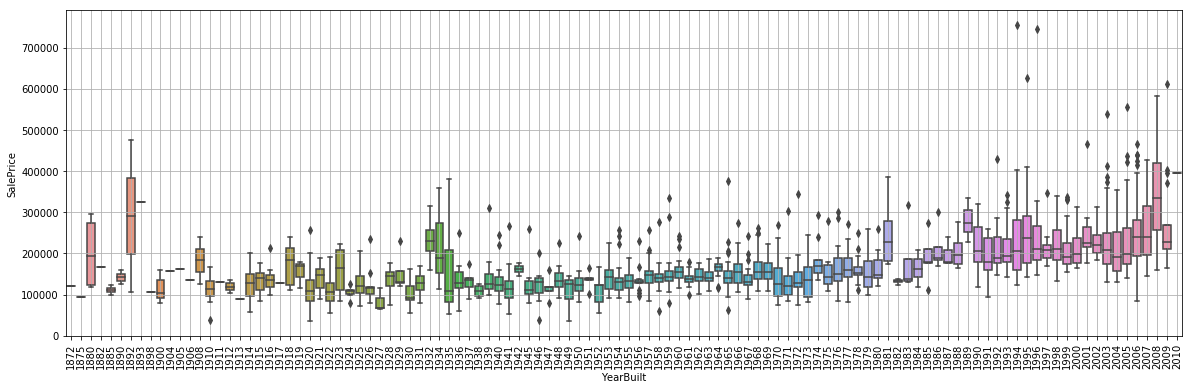

In [83]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df_train, ax=ax)
ax.grid()
plt.xticks(rotation=90);

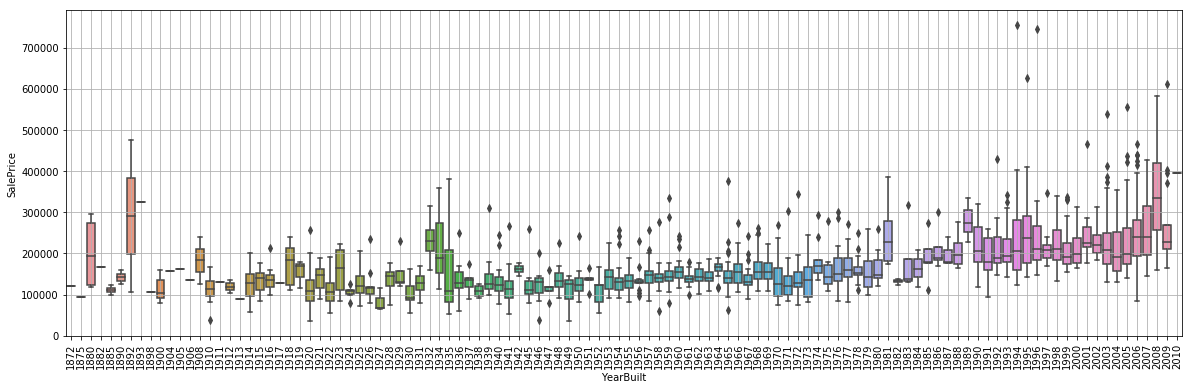

In [84]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df_train_clean, ax=ax)
ax.grid()
plt.xticks(rotation=90);

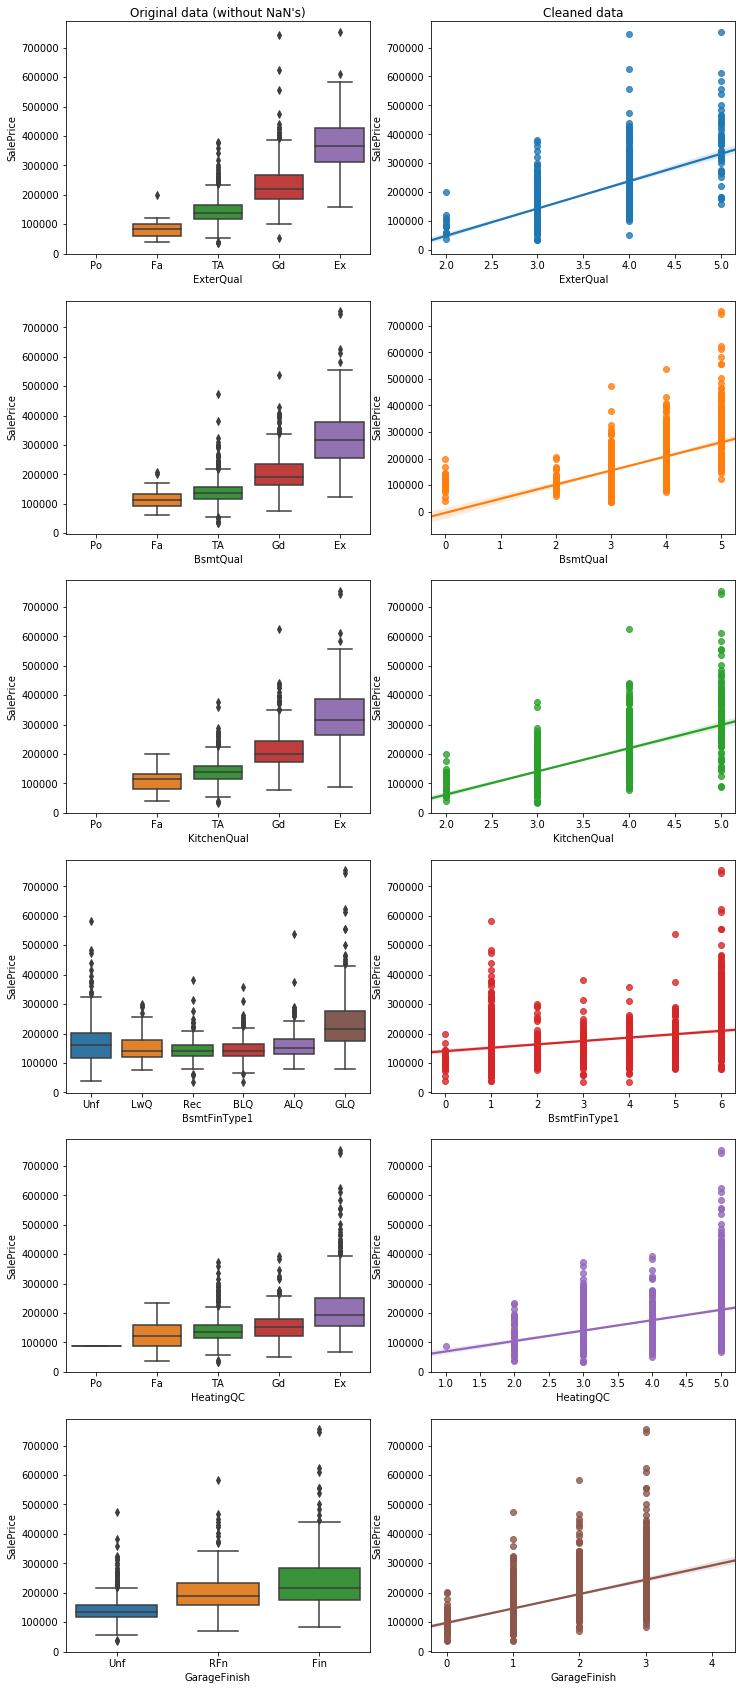

In [91]:
fig, ax = plt.subplots(6, 2, figsize=(12, 30))

sns.boxplot(x='ExterQual', y='SalePrice', data=df_train, order=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ax=ax[0, 0])
ax[0, 0].set_title("Original data (without NaN's)")
sns.regplot(x='ExterQual', y='SalePrice', data=df_train_clean, ax=ax[0, 1])
ax[0, 1].set_title("Cleaned data")

sns.boxplot(x='BsmtQual', y='SalePrice', data=df_train, order=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ax=ax[1, 0])
sns.regplot(x='BsmtQual', y='SalePrice', data=df_train_clean, ax=ax[1, 1])


sns.boxplot(x='KitchenQual', y='SalePrice', data=df_train, order=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ax=ax[2, 0])
sns.regplot(x='KitchenQual', y='SalePrice', data=df_train_clean, ax=ax[2, 1])

sns.boxplot(x='BsmtFinType1', y='SalePrice', data=df_train, 
               order=['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ax=ax[3, 0])
sns.regplot(x='BsmtFinType1', y='SalePrice', data=df_train_clean, ax=ax[3, 1])


sns.boxplot(x='HeatingQC', y='SalePrice', data=df_train, order=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ax=ax[4, 0])
sns.regplot(x='HeatingQC', y='SalePrice', data=df_train_clean, ax=ax[4, 1])


sns.boxplot(x='GarageFinish', y='SalePrice', data=df_train, 
               order=['Unf', 'RFn', 'Fin'], ax=ax[5, 0])
sns.regplot(x='GarageFinish', y='SalePrice', data=df_train_clean, ax=ax[5, 1])

# sns.boxplot(x='Foundation', y='SalePrice', data=df_train, ax=ax[6, 0])

# axes = sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train, ax=ax[7, 0])
# plt.xticks(rotation=90)
# fig.tight_layout()

# Save Cleaned data

In [67]:
# Don't write the index to file. You already have an 'Id' column.
df_train_clean.to_csv('train_clean.csv', index=False)
df_test_clean.to_csv('test_clean.csv', index=False)